In [1]:
from tweepy import OAuthHandler
from tweepy import API
from tweepy import Cursor
import json
import pandas as pd
import time
import matplotlib.pyplot as plt
import numpy as np
consumer_key="Gj2Jom5yJ83X3xKfKowbFyhK2"
consumer_secret="2HctlBNAsMG3mkDHm6tKcC0740jqdwHh9g2IVfrLxXT10ilQZo"
access_token="136011868-rM8MaIryZjsLRL7epoWC1hy7iixG5lej4LN5wICA"
access_token_secret="I9VbyWKe9drnYeOwNTG91aQPe8oJKQxivWwGC28I62OwK"

MAX_TWEETS = 50

# This handles Twitter authentication and the connection to Twitter Streaming API
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = API(auth, wait_on_rate_limit=True)

data = Cursor(api.user_timeline, screen_name='caseyneistat',include_rts = False).items()
user_data = []
current_working_dir = "./"
log_tweets = current_working_dir + 'twittersuserdata.json'
count=0

with open(log_tweets, 'w') as outfile:
    for tweet in data:
        user_data.append(json.loads(json.dumps(tweet._json)))
        outfile.write(json.dumps(tweet._json))
        outfile.write("\n")
        count=count+1
tweets = pd.DataFrame()
tweets['created_at'] = list(map(
    lambda tweet: time.strftime('%m-%d', time.strptime(tweet['created_at'], '%a %b %d %H:%M:%S +0000 %Y')),
    user_data))
tweets['user'] = list(map(lambda tweet: tweet['user']['screen_name'], user_data))
tweets['user_followers_count'] = list(map(lambda tweet: tweet['user']['followers_count'], user_data))
tweets['text'] = list(map(lambda tweet: tweet['text'], user_data))
tweets['lang'] = list(map(lambda tweet: tweet['lang'], user_data))
tweets['Location'] = list(map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, user_data))
tweets['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], user_data))
tweets['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], user_data))
tweets['coordinates'] = list(map(lambda tweet: tweet['coordinates'] if tweet['place'] != None else None, user_data))
tweets['screen_name'] = list(map(lambda tweet: tweet['user']['screen_name'], user_data))
tweets['profile_image_url'] = list(map(lambda tweet: tweet['user']['profile_image_url'], user_data))
tweets['followers_count'] = list(map(lambda tweet: tweet['user']['followers_count'], user_data))
tweets['source'] = list(map(lambda tweet: tweet['source'], user_data))
tweets['url'] = list(map(lambda tweet: tweet['user']['url'], user_data))
tweets['friends_count'] = list(map(lambda tweet: tweet['user']['friends_count'], user_data))
tweets['hashtags'] = list(map(lambda tweet: tweet['entities']['hashtags'][0]['text'] if(tweet['entities']['hashtags']) else 'NaN', user_data))

print(len(tweets))


2639


In [2]:
import numpy as np
print("Total Posts")
print(len(tweets))
print("Followers")
print(max(list(tweets['user_followers_count'].unique())))
print("Following")
print(max(list(tweets['friends_count'].unique())))
print("Average Likes")
print((tweets['favorite_count'].sum()/len(tweets)))
print("Average Retweets")
print((tweets['retweet_count'].sum()/len(tweets)))

print("Account Statistics")
twitter_created = list(tweets['created_at'].unique())

#Engagements

tweets['engagements'] = tweets['retweet_count']+tweets['favorite_count']
sort_by_engagements = (tweets.sort_values(['engagements'], ascending=[0])).loc[: 10,['text','retweet_count','favorite_count','created_at']]
print(sort_by_engagements.head())

print("Follower Growth")
print(tweets.loc[:,['created_at','followers_count']].head())

print("Top Hastags")
print(tweets['hashtags'].value_counts().head())


Total Posts
2639
Followers
1154051
Following
1289
Average Likes
2596.769230769231
Average Retweets
285.13793103448273
Account Statistics
                                                   text  retweet_count  \
1970  SNOWBOARD TIMES SQUARE 2016, have you seen it?...          26645   
1097                #RIPHarambe https://t.co/aSqeJgyXBJ           9433   
1469  they said I couldn't ride my skateboard in Ams...           5925   
675   she wears a bathrobe to dinner because she's g...           3127   
1971  you should probably check out my new video -- ...           8573   

      favorite_count created_at  
1970           33650      01-24  
1097           32244      10-01  
1469           23065      05-26  
675            24563      01-05  
1971           17315      01-24  
Follower Growth
  created_at  followers_count
0      04-12          1154051
1      04-11          1154051
2      04-11          1154051
3      04-11          1154051
4      04-11          1154051
Top Hastags
NaN   

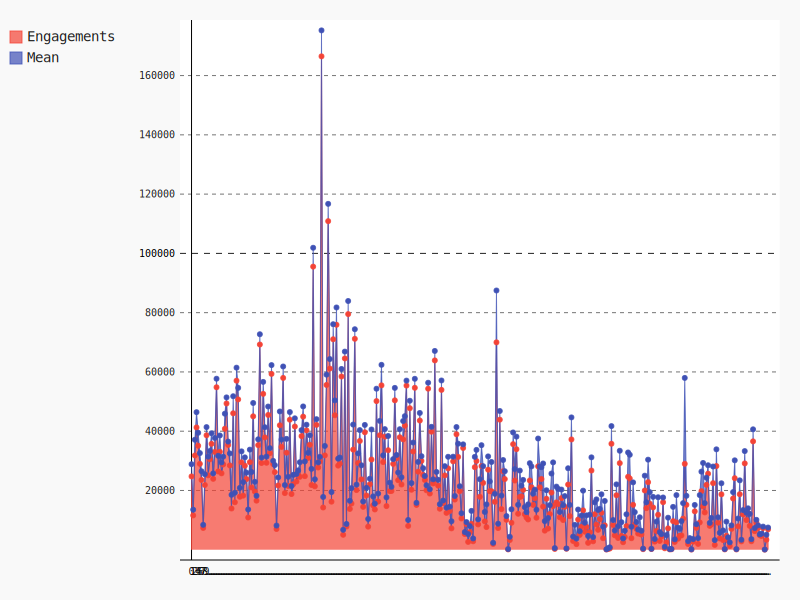

In [3]:
c=0
created_at=[]
engagements=[]
average=[]
df_avg = pd.DataFrame()
for i in twitter_created:
    rt_count=(tweets.loc[tweets['created_at'] == i,['retweet_count','favorite_count']])
    created_at.append(i)
    engagements.append(rt_count['retweet_count'].sum()+rt_count['favorite_count'].sum())
    average.append((rt_count['retweet_count'].sum()/len(rt_count))+(rt_count['favorite_count'].sum()/len(rt_count)))
df_avg['created_at']=created_at
df_avg['engagements']=engagements
df_avg['mean']=average
import pygal as pg
from IPython.display import SVG
line_chart = pg.StackedLine(fill=True)
line_chart.x_labels = map(str, range(0, len(df_avg.loc[:,['created_at']])))
line_chart.add('Engagements', list(df_avg['engagements']))
line_chart.add('Mean', list(df_avg['mean']))
SVG(line_chart.render())

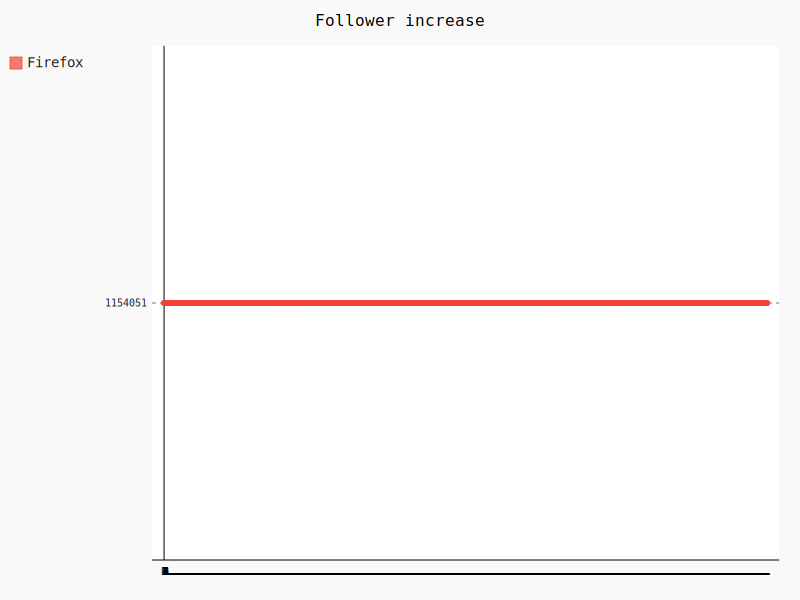

In [5]:
import pygal as pg
from IPython.display import SVG
line_chart = pg.Line()
line_chart.title = 'Follower increase'
line_chart.x_labels = map(str, range(0, len(tweets.loc[:,['followers_count']])))
line_chart.add('Firefox', list(tweets['followers_count']))
SVG(line_chart.render())

In [10]:
tweets['photo_url'] = list(map(lambda tweet: tweet['extended_entities']['media'][0]['media_url'] if 'extended_entities' in tweet else None, user_data))
tweets['type'] = list(map(lambda tweet: tweet['extended_entities']['media'][0]['type'] if 'extended_entities' in tweet else None, user_data))
tweets['expanded_url'] = list(map(lambda tweet: tweet['extended_entities']['media'][0]['expanded_url'] if 'extended_entities' in tweet else None, user_data))
print('Photos')
photos=(tweets.loc[tweets['type'] == 'photo']).loc[:,['media_url','type']]
print(photos[:10])
print('\n')
print('Videos')
video=(tweets.loc[tweets['type'] == 'video']).loc[:,['media_url','type','expanded_url']]
print(video[:10])

Photos
                                         media_url   type
7   http://pbs.twimg.com/media/C9E-9M6XYAEGS_I.jpg  photo
10  http://pbs.twimg.com/media/C9AaKNtUAAEJ-R6.jpg  photo
15  http://pbs.twimg.com/media/C85qIksXgAALG64.jpg  photo
18  http://pbs.twimg.com/media/C80MPAdXoAI23K6.jpg  photo
22  http://pbs.twimg.com/media/C8wIg8vXgAUxqKZ.jpg  photo
37  http://pbs.twimg.com/media/C8gHfmWVYAE17iT.jpg  photo
38  http://pbs.twimg.com/media/C8gAsB-WsAEx7fx.jpg  photo
39  http://pbs.twimg.com/media/C8ftW8rUIAAUy9X.jpg  photo
40  http://pbs.twimg.com/media/C8dKkBZVYAAyBf9.jpg  photo
67  http://pbs.twimg.com/media/C8HwZ9ZVoAERbKT.jpg  photo


Videos
                                             media_url   type  \
167  http://pbs.twimg.com/ext_tw_video_thumb/843451...  video   
181  http://pbs.twimg.com/ext_tw_video_thumb/842392...  video   
187  http://pbs.twimg.com/ext_tw_video_thumb/842132...  video   
199  http://pbs.twimg.com/ext_tw_video_thumb/841357...  video   
261  http://pbs.twimg

In [1]:
import tensorflow

ImportError: Traceback (most recent call last):
  File "C:\Users\dhineshvikram\New folder\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 18, in swig_import_helper
    fp, pathname, description = imp.find_module('_pywrap_tensorflow', [dirname(__file__)])
  File "C:\Users\dhineshvikram\New folder\lib\imp.py", line 296, in find_module
    raise ImportError(_ERR_MSG.format(name), name=name)
ImportError: No module named '_pywrap_tensorflow'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\dhineshvikram\New folder\lib\site-packages\tensorflow\python\__init__.py", line 54, in <module>
    from tensorflow.python import pywrap_tensorflow
  File "C:\Users\dhineshvikram\New folder\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 28, in <module>
    _pywrap_tensorflow = swig_import_helper()
  File "C:\Users\dhineshvikram\New folder\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 20, in swig_import_helper
    import _pywrap_tensorflow
ModuleNotFoundError: No module named '_pywrap_tensorflow'


Error importing tensorflow.  Unless you are using bazel,
you should not try to import tensorflow from its source directory;
please exit the tensorflow source tree, and relaunch your python interpreter
from there.